In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import h5py
import flammkuchen as fl
import os

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


In [3]:
from sklearn.neighbors import NearestNeighbors
from nilearn.connectome import ConnectivityMeasure
from sklearn.manifold import SpectralEmbedding


## Load data

In [4]:
current_results_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_3\fig_3')

In [5]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')
tensor =fl.load(master_path/ 'tensors'/'tensor_ipsi_contra_pos.h5')
features = pd.read_csv(master_path/ 'features_bouts_new.csv')
df_features = pd.read_csv(master_path /'heatmap_features.csv')

In [6]:
tail = tensor[:, 0]
fin_1 = tensor[:,1]
fin_2 = tensor[:,2]

In [7]:
fin_all = np.concatenate((fin_1 ,fin_2),axis=-1)

In [8]:
results_path = master_path / 'Embeddings'

True


In [9]:
matrix_fins_cov = fl.load(results_path/ 'matrix_fins_cov.h5')
X_transformed = fl.load(results_path/ 'fin_cov_embeddings.h5')

### Plot examples in all dimensions

In [10]:
sorted_arr_0 = np.sort(X_transformed[:,0], axis=0)  
sorted_arr_1 = np.sort(X_transformed[:,1], axis=0)  
sorted_arr_2 = np.sort(X_transformed[:,2], axis=0)  

inds_arr_0 = np.argsort(X_transformed[:,0], axis=0)  
inds_arr_1 = np.argsort(X_transformed[:,1], axis=0)  
inds_arr_2 = np.argsort(X_transformed[:,2], axis=0)  

inds_arr_0

array([6799, 6830, 5659, ..., 7073, 4575, 2182], dtype=int64)

### Chunk sorted indices

In [11]:
num_chunks= 5
chunks_0 = np.array_split(inds_arr_0, num_chunks)
chunks_1 = np.array_split(inds_arr_1, num_chunks)
chunks_2 = np.array_split(inds_arr_2, num_chunks)

In [12]:
# Generate colors for each chunk using the 'hls' colormap from Seaborn
colormap = sns.color_palette("flare", num_chunks)
colormap

[(0.91262605, 0.52893336, 0.40749715),
 (0.87199254, 0.3633634, 0.35974223),
 (0.75861834, 0.25356035, 0.40663694),
 (0.60407977, 0.21017746, 0.43913439),
 (0.44584668, 0.17360625, 0.43114133)]

In [13]:
alph=0.2
dot_size=1
cm = 1/2.54  # centimeters in inches
f_size = 20
lw=0.5
dpi= 600

In [14]:
# Initialize an array to store RGB colors for each data point
colors = np.zeros((X_transformed.shape[0], 3))  # Only using RGB without alpha here

# Assign colors to each point based on its chunk
for ind, indices in enumerate(chunks_0):
    color = colormap[ind]
    colors[indices, :] = color  # Assign RGB values

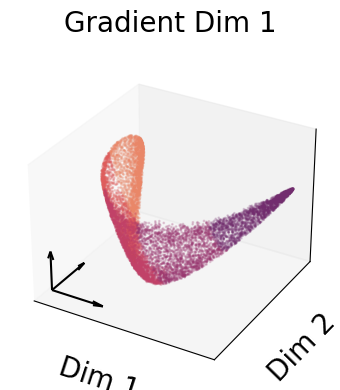

In [15]:

fig = plt.figure(figsize=(10*cm, 10*cm))
ax = fig.add_subplot(projection='3d')
fig.patch.set_facecolor('none')
ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2], alpha=alph, s=dot_size, c=colors)

ax.grid(b=None)
origin = np.array([0, 0, 0])

# Define the 3 basis vectors (unit vectors along x, y, z axes)
u = np.array([1, 0, 0])  # x-axis unit vector
v = np.array([0, 1, 0])  # y-axis unit vector
w = np.array([0, 0, 1])  # z-axis unit vector

# Plot the vectors using quiver
ax.quiver(*origin, *u/3, color='k', label='x-axis (i)', arrow_length_ratio=0.2)
ax.quiver(*origin, *v/3, color='k', label='y-axis (j)', arrow_length_ratio=0.2)
ax.quiver(*origin, *w/3, color='k', label='z-axis (k)', arrow_length_ratio=0.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('Dim 1', fontsize=f_size)
ax.set_ylabel('Dim 2', fontsize=f_size)
plt.tight_layout()
plt.tight_layout()
plt.suptitle('Gradient Dim 1', fontsize=f_size)
plt.tight_layout()

fig.savefig('{}/dim_1_chunks_{}_3D.png'.format(current_results_path, num_chunks), dpi = dpi, format='png')
fig.savefig('{}/dim_1_chunks_{}_3D.pdf'.format(current_results_path, num_chunks), dpi = dpi, format='pdf')

In [16]:
# Initialize an array to store RGB colors for each data point
colors = np.zeros((X_transformed.shape[0], 3))  # Only using RGB without alpha here

# Assign colors to each point based on its chunk
for ind, indices in enumerate(chunks_1):
    color = colormap[ind]
    colors[indices, :] = color  # Assign RGB values

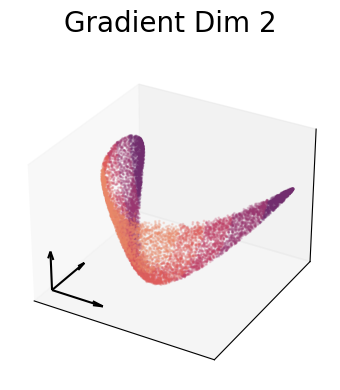

In [17]:

fig = plt.figure(figsize=(10*cm, 10*cm))
ax = fig.add_subplot(projection='3d')
fig.patch.set_facecolor('none')
ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2], alpha=alph, s=dot_size, c=colors)
origin = np.array([0, 0, 0])
ax.grid(b=None)

# Define the 3 basis vectors (unit vectors along x, y, z axes)
u = np.array([1, 0, 0])  # x-axis unit vector
v = np.array([0, 1, 0])  # y-axis unit vector
w = np.array([0, 0, 1])  # z-axis unit vector

# Plot the vectors using quiver
ax.quiver(*origin, *u/3, color='k', label='x-axis (i)', arrow_length_ratio=0.2)
ax.quiver(*origin, *v/3, color='k', label='y-axis (j)', arrow_length_ratio=0.2)
ax.quiver(*origin, *w/3, color='k', label='z-axis (k)', arrow_length_ratio=0.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.suptitle('Gradient Dim 2', fontsize=f_size)
plt.tight_layout()

fig.savefig('{}/dim_2_chunks_{}_3D.png'.format(current_results_path, num_chunks), dpi = dpi, format='png')
fig.savefig('{}/dim_2_chunks_{}_3D.pdf'.format(current_results_path, num_chunks), dpi = dpi, format='pdf')

In [18]:
# Initialize an array to store RGB colors for each data point
colors = np.zeros((X_transformed.shape[0], 3))  # Only using RGB without alpha here

# Assign colors to each point based on its chunk
for ind, indices in enumerate(chunks_2):
    color = colormap[ind]
    colors[indices, :] = color  # Assign RGB values

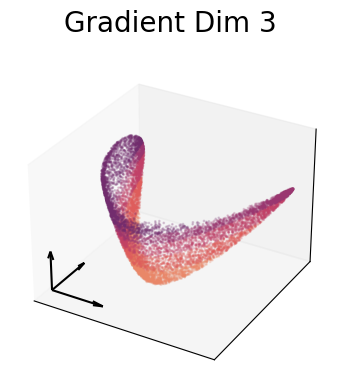

In [19]:

fig = plt.figure(figsize=(10*cm, 10*cm))
ax = fig.add_subplot(projection='3d')
fig.patch.set_facecolor('none')
ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2], alpha=alph, s=dot_size, c=colors)
ax.grid(b=None)
origin = np.array([0, 0, 0])

# Define the 3 basis vectors (unit vectors along x, y, z axes)
u = np.array([1, 0, 0])  # x-axis unit vector
v = np.array([0, 1, 0])  # y-axis unit vector
w = np.array([0, 0, 1])  # z-axis unit vector

# Plot the vectors using quiver
ax.quiver(*origin, *u/3, color='k', label='x-axis (i)', arrow_length_ratio=0.2)
ax.quiver(*origin, *v/3, color='k', label='y-axis (j)', arrow_length_ratio=0.2)
ax.quiver(*origin, *w/3, color='k', label='z-axis (k)', arrow_length_ratio=0.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.suptitle('Gradient Dim 3', fontsize=f_size)
plt.tight_layout()

fig.savefig('{}/dim_3_chunks_{}_3D.png'.format(current_results_path, num_chunks), dpi = dpi, format='png')
fig.savefig('{}/dim_3_chunks_{}_3D.pdf'.format(current_results_path, num_chunks), dpi = dpi, format='pdf')

In [20]:
chunk_list = [chunks_0, chunks_1, chunks_2]

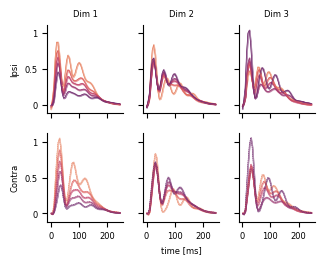

In [25]:

# Create a figure with a set of subplots
fig, axes = plt.subplots(figsize=(8.5*cm, 7*cm), nrows=2, ncols=3, sharex=True, sharey=True, facecolor=None)
axes= axes.ravel()

for i, chunk in enumerate(chunk_list):
    # Initialize an array to store RGB colors for each data point
    colors = np.zeros((X_transformed.shape[0], 3))
    # Assign colors to each point based on its chunk
    for ind, indices in enumerate(chunk):
        color = colormap[ind]
        colors[indices, :] = color  # Assign RGB values
    # Iterate over each chunk and plot the mean trace
    for ind, indices in enumerate(chunk):
        chunk_data = fin_all[indices, :]
        mean_trace = np.mean(chunk_data[:,:50], axis=0)
        axes[i].plot(mean_trace, color=colormap[ind],  label='ipsi', lw=lw)
    
        stderr = np.std(chunk_data[:,:50], axis=0) / np.sqrt(chunk_data[:,:50].shape[0])
        axes[i].fill_between(np.arange(0,50,1), 
                         mean_trace - stderr, 
                         mean_trace + stderr, 
                         color=colormap[ind], 
                         alpha=0.5)
        
        mean_trace = np.mean(chunk_data[:,50:], axis=0)
        axes[3+i].plot(mean_trace, ls=':', color=colormap[ind], label='contra', lw=lw)
        stderr = np.std(chunk_data[:,50:], axis=0) / np.sqrt(chunk_data[:,50:].shape[0])
        # Plot confidence interval as a filled area
        axes[3+i].fill_between(np.arange(0,50,1), 
                         mean_trace - stderr, 
                         mean_trace + stderr, 
                         color=colormap[ind], 
                         alpha=0.5)

axes[-2].set_xlabel('time [ms]', fontsize=f_size)
axes[0].set_ylabel('Ipsi', fontsize=f_size)
axes[3].set_ylabel('Contra', fontsize=f_size)
axes[0].set_title('Dim 1', fontsize=f_size)
axes[1].set_title('Dim 2', fontsize=f_size)
axes[2].set_title('Dim 3', fontsize=f_size)

for ax in axes:
    ax.set_yticks([0,0.5, 1])
    ax.set_yticklabels([0,0.5, 1], fontsize=f_size)
    ax.set_xticks(np.arange(0,51,20))
    ax.set_xticklabels(np.arange(0,51,20)*5, fontsize=f_size)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()

fig.savefig('{}/dim_1_chunk_traces_{}_std_h.png'.format(current_results_path, num_chunks), dpi=dpi, format='png')
fig.savefig('{}/dim_1_chunk_traces_{}_std_h.pdf'.format(current_results_path, num_chunks), dpi=dpi, format='pdf')